In [1]:
import pandas as pd
# df_results = pd.read_csv('../data/content_res_gpt_no_cot_no_con_mini.csv')
df_results = pd.read_csv('../data/content_res_gpt_4o_cot_con.csv')
df_results = df_results.drop(columns=['None of the above'])

df_res = df_results.copy()

In [2]:
import textwrap
df_results.columns = [textwrap.fill(col, width=15) for col in df_results.columns]

df_res

,Rising Production Costs,Opposition to EU Free-Trade Agreements,Environmental Regulations and Agricultural Standards,Bureaucratic Constraints,Opposition to Foreign Agricultural Imports,Subsidy Cuts,Climate and Natural Disaster Relief,Labor and Social Conditions,Solidarity Movements,Opposition to Renewable Energy Projects,Economic Struggles and Agricultural Livelihoods,Consumer Awareness Initiatives,Livestock and Animal Welfare Protests,Opposition to Non-Traditional Products,Infrastructure and Transport Policies,National and Local State Support,Fair Compensation and Market Practices,Miscellaneous Agriculture-Related Protests
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4638,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4640,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [3]:
df_main = pd.read_csv('../data/df_main_protests.csv')

df_main['description'] = df_main['description'].astype(str)
# df_main['description'] = df_main['description'].fillna('')
df_main = df_main.reset_index(drop=True)
df_main.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp', 'population_best', 'month', 'description'],
      dtype='object')

# Bubble Chart

In [4]:
df_reasons_count = pd.DataFrame(df_results.sum(), columns=['occurence'])

df_reasons_count_sorted = df_reasons_count.sort_values(by='occurence', ascending=False).reset_index(names=['reason'])

# df_reasons_count = df_reasons_count[df_reasons_count['reason'] != 'None of the above']
df_reasons_count

df_reasons_count = df_reasons_count.reset_index(names='reason')
df_reasons_count_sorted['color'] = "blue"

In [7]:
%run fcn_bubble_chart.py

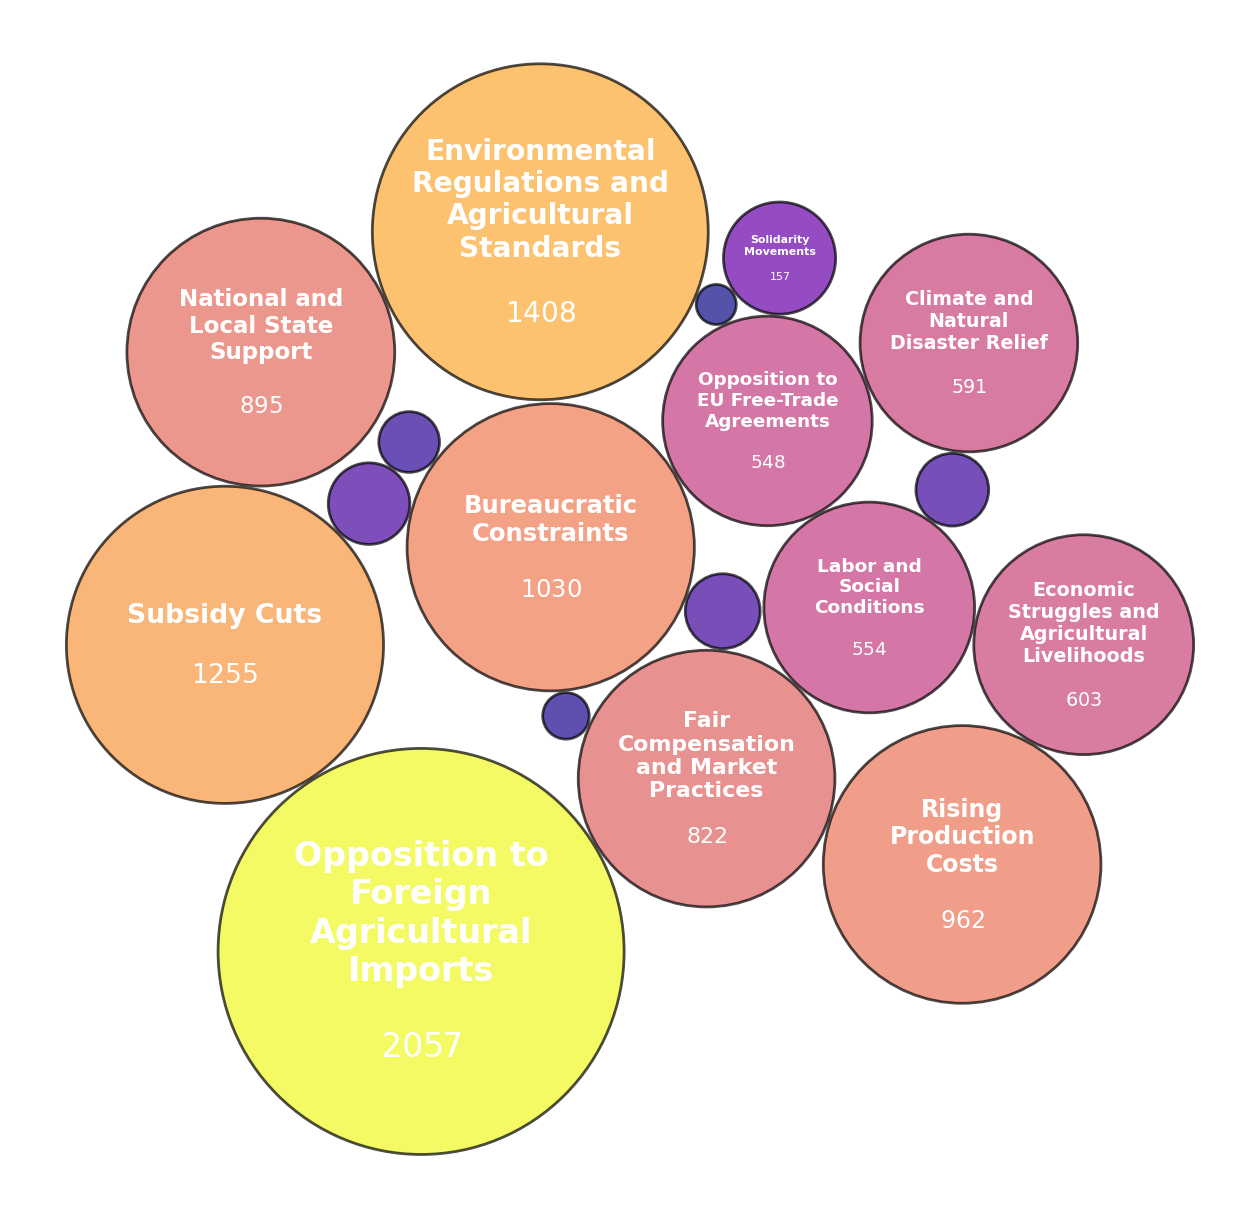

In [8]:
### import matplotlib.pyplot as plt
from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, TextArea, HPacker)
from matplotlib.patches import Circle
import numpy as np
from matplotlib import cm, colors
plt.rcParams["mathtext.fontset"]

df_shuffled = df_reasons_count.sample(frac=1, random_state=2).reset_index(drop=True)
df_shuffled['occurence_str'] = "$" +df_shuffled['occurence'].astype(str)+"$"


#STEP 3
bubble_chart = BubbleChart(area=df_shuffled['occurence'],bubble_spacing=0.3)
#STEP 4
bubble_chart.collapse()

#STEP 5
fig, ax = plt.subplots(figsize=(16,16),subplot_kw=dict(aspect="equal"))

# fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, df_shuffled["reason"].astype(str) +"\n\n"+df_shuffled['occurence_str'], cmap_name='plasma',
    min_font=4, max_font=24,label_font_threshold=7)



# bubble_chart.bubbles[:, 0] *= 2  # make layout more horizontal
bubble_chart.collapse()
ax.set_aspect("equal")
ax.axis("off")
ax.relim()
ax.autoscale_view()


# --- Add COLOR LEGEND (colormap legend) ---

# 1. Define normalization and colormap
#cmap = plt.cm.plasma
#norm = colors.Normalize(vmin=df_shuffled['occurence'].min(),
#                        vmax=df_shuffled['occurence'].max())

# 2. Create a colorbar next to the plot
#cbar = fig.colorbar(
#    cm.ScalarMappable(norm=norm, cmap=cmap),
#    ax=ax,
#    fraction=0.03,      # width of colorbar relative to plot
#    pad=0.09,           # spacing between plot and colorbar
#)

# 3. Customize colorbar labels and title
#cbar.set_label('Occurrences', rotation=270, labelpad=25, fontsize=14, fontweight='bold')
#cbar.ax.tick_params(labelsize=12) 

plt.show()

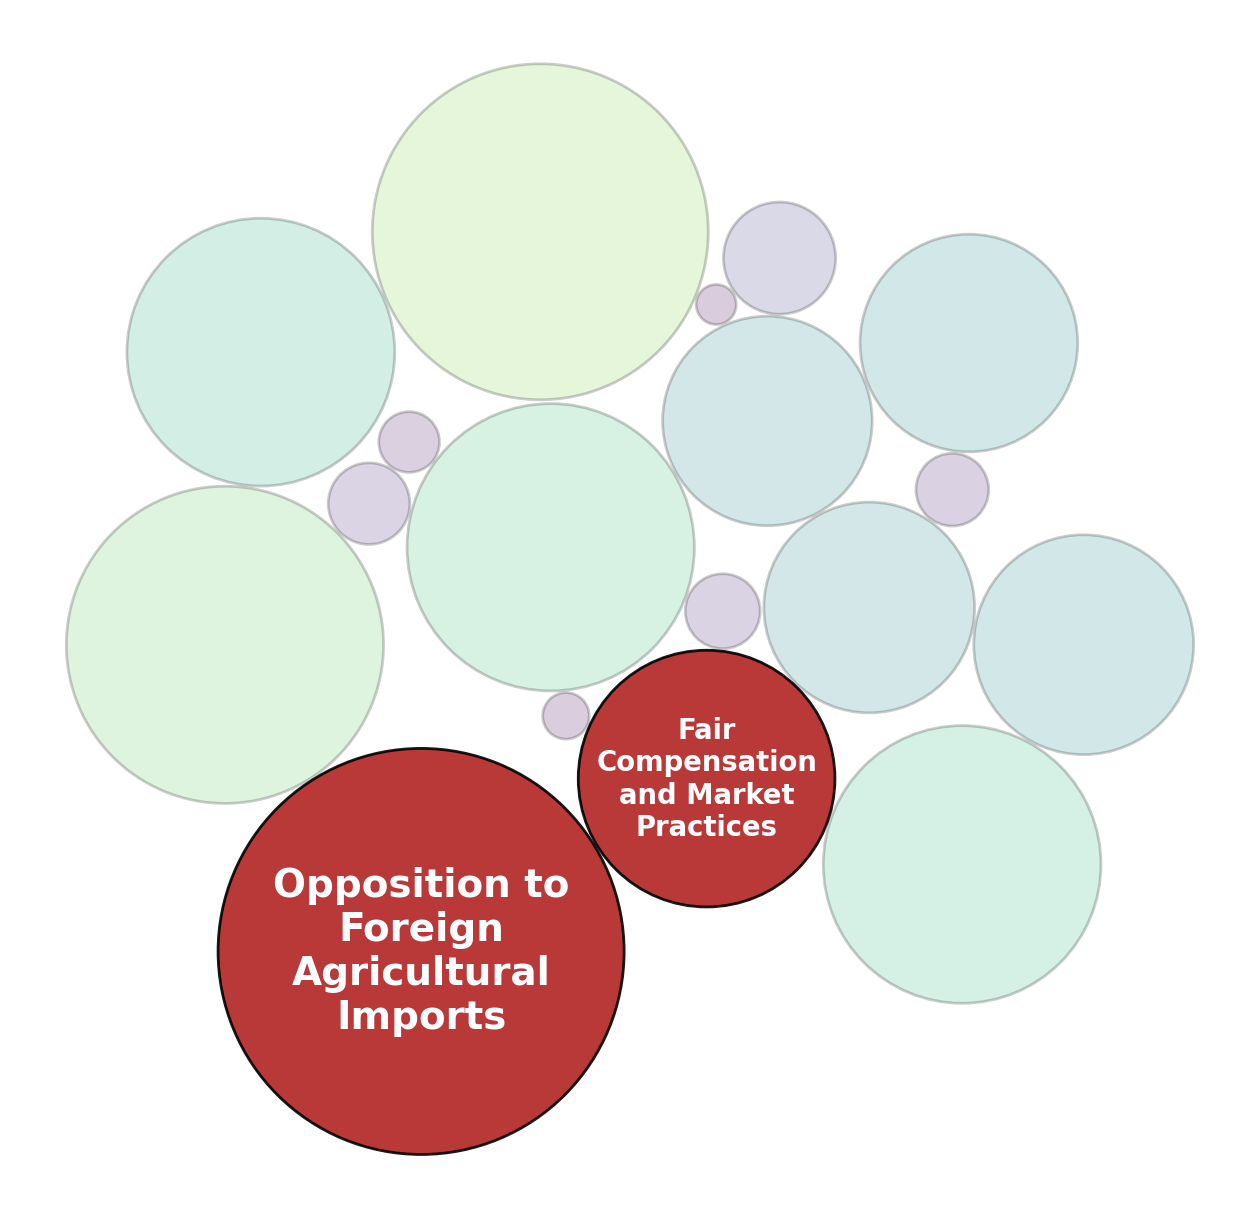

In [9]:
### import matplotlib.pyplot as plt
from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, TextArea, HPacker)
from matplotlib.patches import Circle
import numpy as np
from matplotlib import cm, colors
plt.rcParams["mathtext.fontset"]

df_shuffled = df_reasons_count.sample(frac=1, random_state=2).reset_index(drop=True)
df_shuffled['occurence_str'] = "$" +df_shuffled['occurence'].astype(str)+"$"


#STEP 3
bubble_chart = BubbleChart(area=df_shuffled['occurence'],bubble_spacing=0.3)
#STEP 4
bubble_chart.collapse()

#STEP 5
fig, ax = plt.subplots(figsize=(16,16),subplot_kw=dict(aspect="equal"))

# fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.highlight(highlight_indices=[1, 2], ax=ax, labels=df_shuffled["reason"])



# bubble_chart.bubbles[:, 0] *= 2  # make layout more horizontal
bubble_chart.collapse()
ax.set_aspect("equal")
ax.axis("off")
ax.relim()
ax.autoscale_view()


# --- Add COLOR LEGEND (colormap legend) ---

# 1. Define normalization and colormap
#cmap = plt.cm.plasma
#norm = colors.Normalize(vmin=df_shuffled['occurence'].min(),
#                        vmax=df_shuffled['occurence'].max())

# 2. Create a colorbar next to the plot
#cbar = fig.colorbar(
#    cm.ScalarMappable(norm=norm, cmap=cmap),
#    ax=ax,
#    fraction=0.03,      # width of colorbar relative to plot
#    pad=0.09,           # spacing between plot and colorbar
#)

# 3. Customize colorbar labels and title
#cbar.set_label('Occurrences', rotation=270, labelpad=25, fontsize=14, fontweight='bold')
#cbar.ax.tick_params(labelsize=12) 

plt.show()

# Spatial stuff

In [5]:
reason_list= ["All protests",
              'Opposition to Foreign\nAgricultural Imports',
              'Environmental Regulations\nand Agricultural Standards',
              'Subsidy Cuts',
              'Bureaucratic Constraints',
              'Rising Production Costs',
              'National and Local State\nSupport',
              'Fair Compensation and\nMarket Practices',
              'Climate and Natural\nDisaster Relief',
              'Economic Struggles and\nAgricultural Livelihoods',
              'Labor and Social\nConditions', 
              'Opposition to EU Free-\nTrade Agreements',
              'Solidarity Movements',
              'Infrastructure and\nTransport Policies',
              'Livestock and Animal\nWelfare Protests',
              'Miscellaneous Agriculture-\nRelated Protests',
              'Opposition to Non-\nTraditional Products',    
              'Opposition to Renewable\nEnergy Projects',
              'Consumer Awareness\nInitiatives'
             ]

<Axes: >

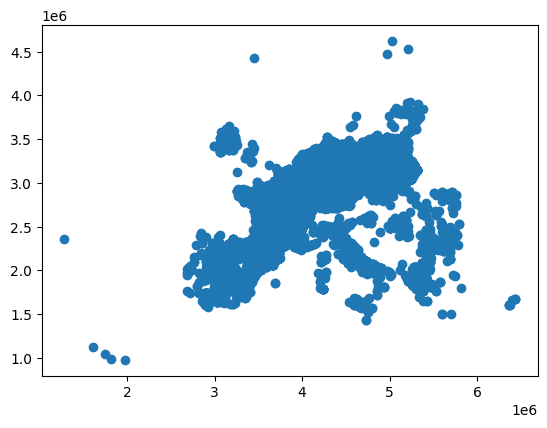

In [6]:
import geopandas as gpd
point_df = gpd.GeoDataFrame(
    df_main,
    geometry=gpd.points_from_xy(df_main.longitude, df_main.latitude),
    crs="WGS1984"
)

point_df = point_df.to_crs(epsg=3035)

point_df.plot()

# Ripley

In [7]:
import geopandas as gpd
from shapely.geometry import Polygon
# Make polygon from bbox coordinates https://stackoverflow.com/a/68741143/18253502
def make_bbox(long0, lat0, long1, lat1):
    return Polygon([[long0, lat0],
                    [long1,lat0],
                    [long1,lat1],
                    [long0, lat1]])
    
bbox = make_bbox(-11,35,30.292969,74.543330)

bbox_gdf = gpd.GeoDataFrame(index=[0], crs='WGS1984', geometry = [bbox])
europe_countries = ['ALB', 'AND', 'AUT', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 
                    'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'XKX', 
                    'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 
                    'NOR', 'POL', 'PRT', 'ROU', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 
                    'CHE', 'UKR', 'GBR', 'VAT']

df_results_full = pd.concat([df_main, df_results], axis=1)

gdf = gpd.GeoDataFrame(
    df_results_full, geometry=gpd.points_from_xy(df_results_full.longitude, df_results_full.latitude), crs="EPSG:4326"
)

# Remove points outside bounding box
mask = gdf.geometry.intersects(bbox_gdf.unary_union)  # Create mask
gdf = gdf[mask]  # Filter GeoDataFrame
gdf = gdf.to_crs(epsg=3035)


# Select columns
gdf['event_date'] = pd.to_datetime(gdf['event_date'])
gdf['month'] = gdf['event_date'].dt.to_period('M')
gdf['month_year'] = gdf['event_date'].dt.strftime('%B %Y')

gdf['days_since_first'] = (gdf['event_date'] - gdf['event_date'].min()).dt.days
gdf['All protests'] = 1

C:\Users\cstetter\AppData\Local\Temp\ipykernel_23264\50729869.py:26: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mask = gdf.geometry.intersects(bbox_gdf.unary_union)  # Create mask


In [8]:
rename_map = {
    'All protests': 'All protests',
    'Opposition to\nForeign\nAgricultural\nImports': 'Opposition to Foreign\nAgricultural Imports',
    'Environmental\nRegulations and\nAgricultural\nStandards': 'Environmental Regulations\nand Agricultural Standards',
    'Subsidy Cuts': 'Subsidy Cuts',
    'Bureaucratic\nConstraints': 'Bureaucratic Constraints',
    'Rising\nProduction\nCosts': 'Rising Production Costs',
    'National and\nLocal State\nSupport': 'National and Local State\nSupport',
    'Fair\nCompensation\nand Market\nPractices': 'Fair Compensation and\nMarket Practices',
    'Climate and\nNatural\nDisaster Relief': 'Climate and Natural\nDisaster Relief',
    'Economic\nStruggles and\nAgricultural\nLivelihoods': 'Economic Struggles and\nAgricultural Livelihoods',
    'Labor and\nSocial\nConditions': 'Labor and Social\nConditions',
    'Opposition to\nEU Free-Trade\nAgreements': 'Opposition to EU Free-\nTrade Agreements',
    'Solidarity\nMovements': 'Solidarity Movements',
    'Infrastructure\nand Transport\nPolicies': 'Infrastructure and\nTransport Policies',
    'Livestock and\nAnimal Welfare\nProtests': 'Livestock and Animal\nWelfare Protests',
    'Miscellaneous\nAgriculture-\nRelated\nProtests': 'Miscellaneous Agriculture-\nRelated Protests',
    'Opposition to\nNon-Traditional\nProducts': 'Opposition to Non-\nTraditional Products',
    'Opposition to\nRenewable\nEnergy Projects': 'Opposition to Renewable\nEnergy Projects',
    'Consumer\nAwareness\nInitiatives': 'Consumer Awareness\nInitiatives'
}

gdf = gdf.rename(columns=rename_map)

# G function

In [10]:
import numpy as np
from pointpats import distance_statistics

def G_find_max_dist(gdf, col, support=150000, n_simulations=99):
    """
    Maximum distance at which the observed and empirical Ripley’s G functions intersect,
    ensuring that the spatial cutoff reflects the scale at which clustering deviates 
    from randomness. Interpolated between two points where intersection occurs.

    Parameters
    ----------
    gdf : GeoDataFrame
        Input geospatial dataframe.
    col : str
        Column to filter on (e.g. binary indicator variable).
    support : int, optional
        Maximum distance for the G-function evaluation (default 150000).
    n_simulations : int, optional
        Number of simulations to build the null distribution (default 99).

    Returns
    -------
    dict
        {
            "g_test": g_test object,
            "empirical": empirical G function,
            "median_sim": theoretical/simulation median,
            "max_dist": maximum distance of deviation (float or None)
        }
    """
    # Subset input
    input_df = gdf[gdf[col] == 1]

    s_coordinates = np.column_stack((input_df.geometry.x, input_df.geometry.y))

    # Run G-test
    g_test = distance_statistics.g_test(
        s_coordinates, 
        support=(0,500000,500), 
        keep_simulations=True, 
        n_simulations=n_simulations
    )

    # Extract empirical G
    empirical = g_test.statistic  

    # Median of simulations
    median_sim = np.median(g_test.simulations, axis=0)
    upper95_sim =  np.percentile(g_test.simulations, 97.5, axis=0)

    # Find intersection points (where sign changes between empirical - median)
    cross_indices = np.where(np.diff(np.sign(empirical - upper95_sim)) != 0)[0]

    cross_distances = []
    for idx in cross_indices:
        x0, x1 = g_test.support[idx], g_test.support[idx + 1]
        y0, y1 = empirical[idx] - upper95_sim[idx], empirical[idx + 1] - upper95_sim[idx + 1]
        if y1 != y0:  # avoid divide by zero
            # Linear interpolation for crossing
            x_cross = x0 - y0 * (x1 - x0) / (y1 - y0)
            cross_distances.append(x_cross)


    return {
        "g_test": g_test,
        "empirical": empirical,
        "median_sim": median_sim,
        "cross_distances": cross_distances
    }

In [16]:
from tqdm import tqdm
results = {}
for reason in tqdm(reason_list[1:]):
    results[reason] = G_find_max_dist(gdf, reason, support=500000, n_simulations=10000)

100%|██████████████████████████████████████████| 18/18 [15:25<00:00, 51.43s/it]


In [17]:
import pickle

with open("data/global_knox_results.pkl", "wb") as f:
    pickle.dump(results, f)

In [9]:
import pickle

with open("data/global_knox_results.pkl", "rb") as f:
    results = pickle.load(f)

Intersection: 71142.28456913828
Intersection: 81162.3246492986
Intersection: 71643.2865731463
Intersection: 79134.92354358525
Intersection: 80661.3226452906
Intersection: 98697.3947895792
Intersection: 116216.50163071237
Intersection: 108211.31189124413
Intersection: 113226.45290581163
Intersection: 99198.39679358718
Intersection: 84168.3366733467
Intersection: 154308.61723446895
Intersection: 218387.99550320153
Intersection: 199340.71040631988
Intersection: 275551.10220440885
Intersection: 273547.0941883768
Intersection: 42084.16833667335
Intersection: 78156.3126252505


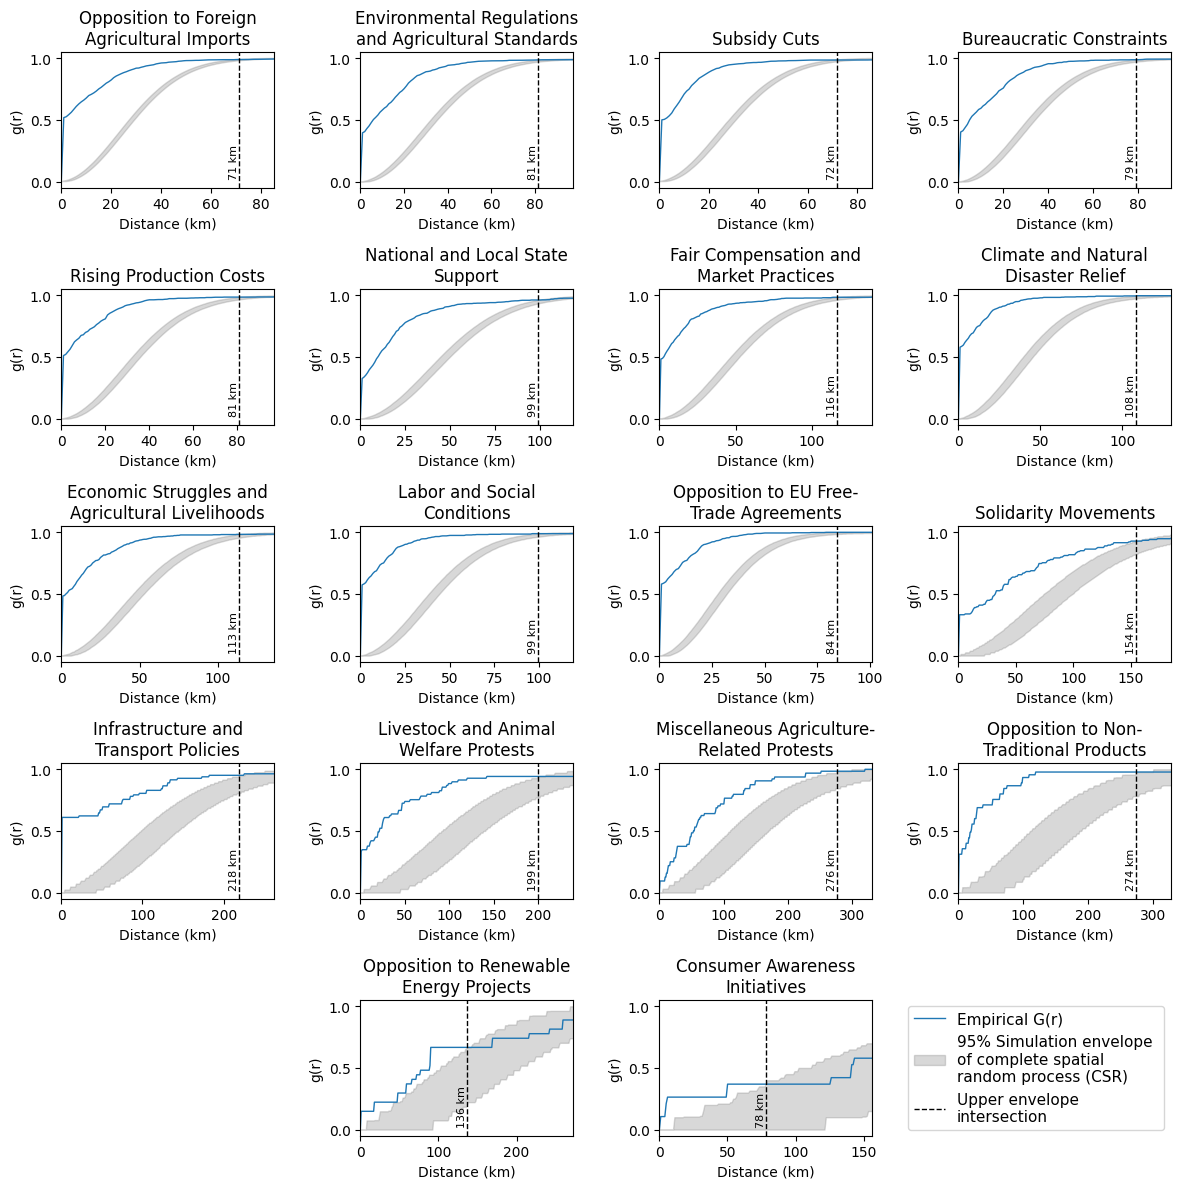

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

n_rows, n_cols = 5, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
axes = axes.flatten()

plotted_axes = []  # keep track of where data was plotted
n_reasons = len(reason_list[1:])

for i, res_name in enumerate(reason_list[1:]):
    if i >= n_rows * n_cols:
        break  # stop if more reasons than subplot slots

    res = results[res_name]
    g_test = res['g_test']

    # --- Shift last two plots to col 1 & 2 ---
    if i >= n_reasons - 2:  # last two plots
        row = i // n_cols
        ax_index = row * n_cols + 1 + (i % 2)  # force col 1,2
        ax = axes[ax_index]
    else:
        ax = axes[i]

    plotted_axes.append(ax)

    print("Intersection:", res['cross_distances'][1])

    # Plot empirical G-function
    line_empirical, = ax.plot(g_test.support, g_test.statistic,
                              label="Empirical G(r)", linewidth=1)

    # Plot envelopes if simulations exist
    patch_env = None
    if hasattr(g_test, "simulations"):
        lower = np.percentile(g_test.simulations, 2.5, axis=0)
        upper = np.percentile(g_test.simulations, 97.5, axis=0)
        patch_env = ax.fill_between(g_test.support, lower, upper,
                                    color="gray", alpha=0.3,
                                    label="95% Simulation envelope \nof complete spatial \nrandom process (CSR)")

    # Determine which cross distance to use
    cross_idx = 1  # default
    if i == n_reasons - 2 and len(res["cross_distances"]) > 2:  # second-last element
        cross_idx = 5

    # Add vertical dashed line if cross distance exists
    if len(res["cross_distances"]) > cross_idx:
        vline = ax.axvline(
            x=res["cross_distances"][cross_idx],
            color="black",
            linestyle="--",
            linewidth=1,
            label=f"Upper envelope\nintersection"
        )

        # Adjust x-axis limits
        if i < n_reasons - 2:
            ax.set_xlim(0, res['cross_distances'][1] * 1.2)
        else:
            ax.set_xlim(0, res['cross_distances'][cross_idx] * 2)
            
        # Add text label
        ax.text(
            res["cross_distances"][cross_idx],
            ax.get_ylim()[1]*0.02,
            f"{res['cross_distances'][cross_idx]/1000:.0f} km",
            rotation=90,
            va="bottom", ha="right", fontsize=8
        )

    # Titles and axis formatting
    ax.set_title(f"{res_name}")
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1000)}"))

    # Labels
    ax.set_xlabel("Distance (km)")
    ax.set_ylabel("g(r)")

# --- Legend in bottom-right subplot ---
legend_ax = axes[-1]
for ax in axes:
    if ax not in plotted_axes and ax is not legend_ax:
        fig.delaxes(ax)

# Collect handles/labels from the last plotted axis
handles, labels = plotted_axes[-1].get_legend_handles_labels()

# Put legend in the empty bottom-right subplot
legend_ax.axis("off")
legend_ax.legend(handles, labels, loc="center right", fontsize=11)

plt.tight_layout()
plt.savefig("../img/g_functions_by_reasons.png", dpi=600, bbox_inches="tight")

plt.show()

# Knox global

In [ ]:
# from tqdm import tqdm
# from pointpats import SpaceTimeEvents, modified_knox, Knox, jacquez, KnoxLocal

# global_knox_res_dict = {}
# rows = []

# for s in tqdm([25000, 50000, 100000, 200000]):
#     for t in [3,7,14]:
#         for i, res_name in enumerate(reason_list[1:]):
#             res = results[res_name]
            
#             # Choose which cross distance
#             if i != 17:
#                 dist = res['cross_distances'][1]
#             else:
#                 dist = res['cross_distances'][5]
        
#             dist = s
        
#             # Subset input
#             input_df = gdf[gdf[res_name] == 1]
        
#             s_coordinates = np.column_stack((input_df.geometry.x, input_df.geometry.y))
#             t_coordinates = np.array(input_df['days_since_first']).reshape(-1, 1)
        
#             # Run modified_knox
#             result = Knox(
#                 s_coordinates,
#                 t_coordinates,
#                 delta=dist,
#                 tau=t,
#                 permutations=1000
#             )
        
#             # Save results in dictionary with a descriptive key
#             key = f"{res_name}"
#             global_knox_res_dict[key] = result
        
#         for res_name in reason_list[1:]:
#             result = global_knox_res_dict[res_name]
            
#             knox_ratio = result.observed / result.expected
#             pvalue = result.p_sim
        
#             rows.append({
#                 "reason": res_name,
#                 "knox_ratio": knox_ratio[0,0],
#                 "pvalue": pvalue,
#                 "time": t,
#                 "distance": s
#             })
    
#     df_knox1 = pd.DataFrame(rows)    

In [ ]:
# import matplotlib.pyplot as plt

# # Get raw p-values
# raw_p = df_knox1["pvalue"].values

# # Adjust with Benjamini-Hochberg FDR (False Discovery Rate)
# reject, p_adj, _, _ = smm.multipletests(raw_p, alpha=0.05, method='fdr_bh')

# # Add back to dataframe
# df_knox1["p_adj"] = p_adj

# # Unique reasons
# reasons = df_knox1['reason'].unique()
# n_reasons = len(reasons)

# # Unique distances and a color cycle
# distances = sorted(df_knox1['distance'].unique())
# cmap = plt.cm.get_cmap("tab10", len(distances))
# color_map = {dist: cmap(i) for i, dist in enumerate(distances)}

# # Set up subplots
# n_cols = 4
# n_rows = (n_reasons + n_cols - 1) // n_cols
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*3), sharex=True, sharey=False)
# axes = axes.flatten()

# for i, reason in enumerate(reasons):
#     ax = axes[i]
#     subset = df_knox1[df_knox1['reason'] == reason]

#     for dist, group in subset.groupby("distance"):
#         group = group.sort_values("time")  # make sure time is ordered
#         color = color_map[dist]

#         # Draw line connecting points for this distance
#         ax.plot(group['time'], group['knox_ratio'],
#                 color=color, linewidth=1, alpha=0.7, label=f"dist={dist}")

#         # Scatter points with marker depending on significance
#         for _, row in group.iterrows():
#             if row['p_adj'] > 0.05:
#                 marker = "s"   # square
#             elif (row['p_adj'] <= 0.05) & (row['p_adj'] > 0.01):
#                 marker = "P"   # plus-filled
#             else:  # p <= 0.01
#                 marker = "*"   # star

#             ax.scatter(row['time'], row['knox_ratio'],
#                        marker=marker, s=100, color=color, edgecolor="black")

#     ax.set_title(reason, fontsize=9)
#     ax.set_xlabel("Time")
#     ax.set_ylabel("Knox Ratio")

# # Remove unused axes
# for j in range(i+1, len(axes)):
#     fig.delaxes(axes[j])

# # Legend (colors = distances)
# handles = [plt.Line2D([0], [0], color=color_map[dist], lw=2, label=f"dist={dist}")
#            for dist in distances]
# fig.legend(handles=handles, loc="upper center", ncol=len(distances))

# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()


In [9]:
from pointpats import modified_knox
import gc
from tqdm import tqdm

with open("data/global_knox_results.pkl", "rb") as f:
    results = pickle.load(f)
rows = []

for t in tqdm([3, 7, 14, 30]):
    for i, res_name in enumerate(reason_list[1:]):

        input_df = gdf[gdf[res_name] == 1]

        # Skip small samples
        if len(input_df) < 10:
            continue

        # Select distance threshold
        dist = results[res_name]['cross_distances'][1 if i != 16 else 5]
        dist = int(dist)

        # Coordinates
        s_coordinates = np.column_stack(
            (input_df.geometry.x.values, input_df.geometry.y.values)
        )
        t_coordinates = input_df['days_since_first'].values

        # Baker-modified Knox
        res = modified_knox(
            s_coordinates,
            t_coordinates,
            delta=dist,
            tau=t
        )

        rows.append({
            "reason": res_name,
            "modified_knox_stat": res['stat'],
            "pvalue": res['pvalue'],
            "time": t,
            "dist_km": dist / 1000,
            "n_events": len(input_df)
        })

        gc.collect()

df_mknox = pd.DataFrame(rows)


100%|████████████████████████████████████████████| 4/4 [01:36<00:00, 24.17s/it]


In [10]:
df_knox = df_mknox

In [11]:
import statsmodels.stats.multitest as smm

# Get raw p-values
raw_p = df_knox["pvalue"].values

# Adjust with Benjamini-Hochberg FDR (False Discovery Rate)
reject, p_adj, _, _ = smm.multipletests(raw_p, alpha=0.05, method='fdr_bh')

# Add back to dataframe
df_knox["p_adj"] = p_adj

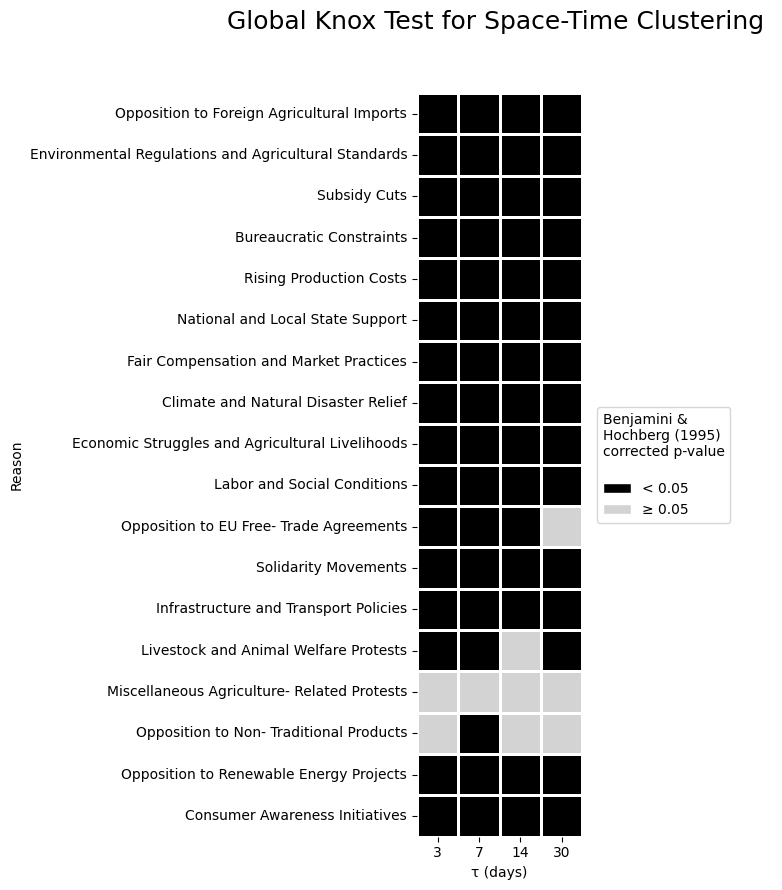

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import pickle


    
# Pivot data
heatmap_df = df_knox.pivot(index='reason', columns='time', values='modified_knox_stat')
pvalue_df = df_knox.pivot(index='reason', columns='time', values='p_adj')

# Reorder rows to match reason_list
heatmap_df = heatmap_df.reindex(reason_list[1:])
pvalue_df = pvalue_df.reindex(reason_list[1:])

# Binary significance: 1 = significant, 0 = not
binary_sig = (pvalue_df < 0.05).astype(int)
binary_sig.index =  binary_sig.index.str.replace("\n", " ")
# Custom colormap: 0 = grey, 1 = black
cmap = ListedColormap(["lightgrey", "black"])

plt.figure(figsize=(12, max(4, len(heatmap_df)/2)))
sns.heatmap(
    binary_sig,
    # annot=np.round(heatmap_df, 2),   # show Knox statistic
    fmt=".2f",
    cmap=cmap,
    cbar=False,
    linewidths=1,
    linecolor="white",
    square=True                     # make cells square
)

# Labels
plt.xlabel("τ (days)")
plt.ylabel("Reason")
plt.title("Global Knox Test for Space-Time Clustering \n\n", fontsize=18)

# Create custom legend
legend_elements = [
    mpatches.Patch(facecolor='black', edgecolor='white', label='< 0.05'),
    mpatches.Patch(facecolor='lightgrey', edgecolor='white', label='≥ 0.05')
]
plt.legend(handles=legend_elements, 
           title="Benjamini &\nHochberg (1995)\ncorrected p-value\n", 
           bbox_to_anchor=(1.05, .5), 
           loc='center left',
           alignment="left"
          )

plt.tight_layout()
plt.savefig("../img/modified_knox_tests.png", dpi=600, bbox_inches="tight")
plt.show()


# Local Knox

In [10]:
import geopandas as gpd
from shapely.geometry import Polygon


# Load europe
geofile = "../data/gadm_410-levels.gpkg"

print(
    gpd.list_layers(geofile)
     )


# Make polygon from bbox coordinates https://stackoverflow.com/a/68741143/18253502
def make_bbox(long0, lat0, long1, lat1):
    return Polygon([[long0, lat0],
                    [long1,lat0],
                    [long1,lat1],
                    [long0, lat1]])

# # Coords covering Europe & Russia made with http://bboxfinder.com
bbox = make_bbox(-11,35,30.292969,74.543330)

# # STEP 2 #
# # Convert to gdf
bbox_gdf = gpd.GeoDataFrame(index=[0], crs='WGS1984', geometry = [bbox])
europe_countries = ['ALB', 'AND', 'AUT', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 
                    'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'XKX', 
                    'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD', 'MKD', 
                    'NOR', 'POL', 'PRT', 'ROU', 'SMR', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 
                    'CHE', 'UKR', 'GBR', 'VAT']

world0 = gpd.read_file(geofile, layer='ADM_0')
europe0 = world0.overlay(bbox_gdf, how="intersection")
europe0 = europe0[europe0["GID_0"].isin(europe_countries)]
europe0 = europe0.rename(columns={"GID_0": "id"})
europe0 = europe0.to_crs(epsg=3035)
europe0 = europe0.simplify(0.1)


del world0

# world1 = gpd.read_file(geofile, layer='ADM_1')
# europe1 = world1.overlay(bbox_gdf, how="intersection")
# europe1 = europe1[europe1["GID_0"].isin(europe_countries)]
# europe1 = europe1.rename(columns={"GID_1": "id"})
# europe1 = europe1.to_crs(epsg=3035)

# del world1

# world2 = gpd.read_file(geofile, layer='ADM_2')
# europe2 = world2.overlay(bbox_gdf, how="intersection")
# europe2 = europe2[europe2["GID_0"].isin(europe_countries)]
# europe2 = europe2.rename(columns={"GID_2": "id"})
# europe2 = europe2.to_crs(epsg=3035)

# del world2

    name geometry_type
0  ADM_0  MultiPolygon
1  ADM_1  MultiPolygon
2  ADM_2  MultiPolygon
3  ADM_3  MultiPolygon
4  ADM_4  MultiPolygon
5  ADM_5  MultiPolygon


In [18]:
import pickle
with open("data/global_knox_results.pkl", "rb") as f:
    results = pickle.load(f)

In [20]:
from tqdm import tqdm
from pointpats import KnoxLocal
import numpy as np

local_knox_res_dict = {}
rows = []

for i, res_name in tqdm(enumerate(reason_list[1:])):
    res = results[res_name]
    
    # Choose which cross distance
    if i != 17:
        dist = res['cross_distances'][1]
    else:
        dist = res['cross_distances'][5]

    # Subset input
    input_df = gdf[gdf[res_name] == 1]

    s_coordinates = np.column_stack((input_df.geometry.x, input_df.geometry.y))
    t_coordinates = np.array(input_df['days_since_first']).reshape(-1, 1)

    # Run modified_knox
    result = KnoxLocal(
        s_coordinates,
        t_coordinates,
        delta=dist,
        tau=7,
        permutations=1000,
        crs= 'EPSG:3035',
        ids = np.array(input_df.index)
    )

    # Save results in dictionary with a descriptive key
    key = f"{res_name}"
    local_knox_res_dict[key] = result

# for res_name in reason_list[1:]:
#     result = global_knox_res_dict[res_name]
    
#     knox_ratio = result.observed / result.expected
#     pvalue = result.p_sim

#     rows.append({
#         "reason": res_name,
#         "knox_ratio": knox_ratio[0,0],
#         "pvalue": pvalue,
#         "time": t,
#         "distance": s
#     })

# df_knox1 = pd.DataFrame(rows)    

KeyboardInterrupt: 

In [ ]:
import pickle

with open("local_knox_results.pkl", "wb") as f:
    pickle.dump(local_knox_res_dict, f)

In [11]:
import pickle

# Read the data from the file
with open("data/local_knox_results.pkl", "rb") as f:
    local_knox_res_dict = pickle.load(f)

In [12]:
hotspot_gdf = pd.concat(
    [
        local_knox_res_dict[reason].hotspots().assign(reason=reason)
        for reason in reason_list[1:]
    ],
    ignore_index=True
)
hotspot_gdf = hotspot_gdf.rename(columns={'focal_time': 'days_since_first'})

In [13]:
id_cols = [
    'event_id_cnty', 'event_date', 'year', 'time_precision',
    'disorder_type', 'event_type', 'sub_event_type', 'actor1',
    'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
    'interaction', 'civilian_targeting', 'iso', 'region', 'country',
    'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
    'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
    'tags', 'timestamp', 'population_best', 'month', 'description',
    'geometry', 'month_year', 'days_since_first'
]

gdf_long = gdf.melt(
    id_vars=id_cols,
    value_vars=reason_list[1:],
    var_name='reason',
    value_name='value'
)

gdf_long = gpd.GeoDataFrame(gdf_long, geometry='geometry', crs=gdf.crs)

# Optional: drop rows with NaN or 0 values in 'value'
gdf_long = gdf_long[gdf_long['value'].notna() & (gdf_long['value'] != 0)]

In [14]:
knox_gdf = gdf_long.merge(
    hotspot_gdf,
    on=["reason", "geometry", "days_since_first"],   # if hotspot_gdf has a focal_time column
    how="left"
)

knox_gdf['event_date'] = pd.to_datetime(knox_gdf['event_date'])

# Compute cluster-wise start and end dates
knox_gdf['cluster_start'] = knox_gdf.groupby(["cluster", "reason"])['event_date'].transform('min')
knox_gdf['cluster_end']   = knox_gdf.groupby(["cluster", "reason"])['event_date'].transform('max')

knox_gdf['cluster_timespan'] = (
    knox_gdf['cluster_start'].dt.strftime('%Y-%m-%d')
    + " → " + 
    knox_gdf['cluster_end'].dt.strftime('%Y-%m-%d')
)

knox_gdf['cluster_days'] = (knox_gdf['cluster_end'] - knox_gdf['cluster_start']).dt.days + 1

In [15]:
n_clusters = knox_gdf.groupby("reason")["cluster"].nunique()
mean_cluster_days = knox_gdf.groupby("reason")["cluster_days"].mean()

avg_cluster_size = knox_gdf.groupby(["reason", "cluster"]).size().reset_index(name="avg_cluster_size").groupby("reason").mean("avg_cluster_size")["avg_cluster_size"]

mean_event_date_by_cluster = (
    knox_gdf
    .groupby(["reason", "cluster"])["event_date"]
    .mean()
)

mean_event_date_by_reason = (
    mean_event_date_by_cluster
    .groupby("reason")
    .mean()
    .astype(str)
    .str[:10]
)

summary_df = pd.DataFrame({
    "n_clusters": n_clusters,
    "avg_cluster_size": avg_cluster_size,
    "mean_event_date_by_cluster": mean_event_date_by_reason,
    "mean_cluster_days": mean_cluster_days
    
}).reset_index()

summary_df["reason"] = pd.Categorical(
    summary_df["reason"],
    categories=reason_list,
    ordered=True
)

summary_df = summary_df.sort_values("reason").reset_index(drop=True)

summary_df

,reason,n_clusters,avg_cluster_size,mean_event_date_by_cluster,mean_cluster_days
0,Opposition to Foreign\nAgricultural Imports,111,13.954955,2024-02-08,14.174306
1,Environmental Regulations\nand Agricultural St...,66,16.333333,2024-01-31,12.366419
2,Subsidy Cuts,52,17.519231,2024-01-14,15.356751
3,Bureaucratic Constraints,47,18.659574,2024-02-08,10.297605
4,Rising Production Costs,43,17.558140,2024-01-25,13.606623
5,National and Local State\nSupport,41,13.414634,2024-02-06,9.074545
6,Fair Compensation and\nMarket Practices,28,23.464286,2024-02-10,17.162861
7,Climate and Natural\nDisaster Relief,18,27.055556,2024-02-10,18.694045
8,Economic Struggles and\nAgricultural Livelihoods,18,18.055556,2024-01-28,14.150769
9,Labor and Social\nConditions,16,23.437500,2024-02-08,15.842667


5it [10:30, 126.04s/it]


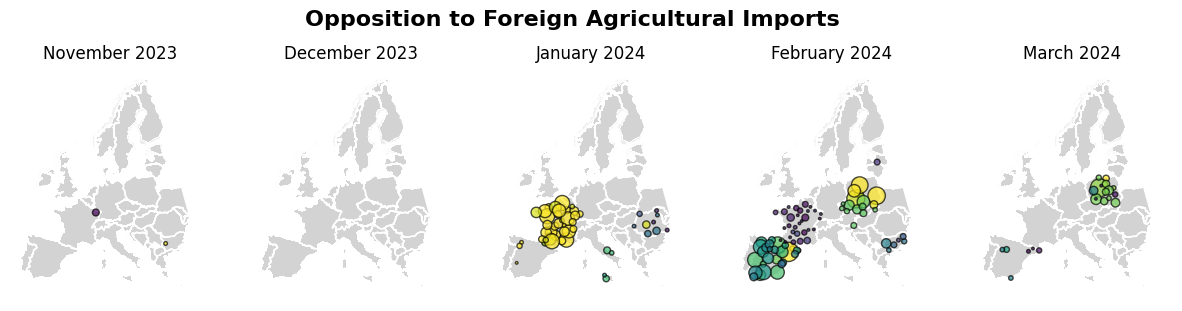

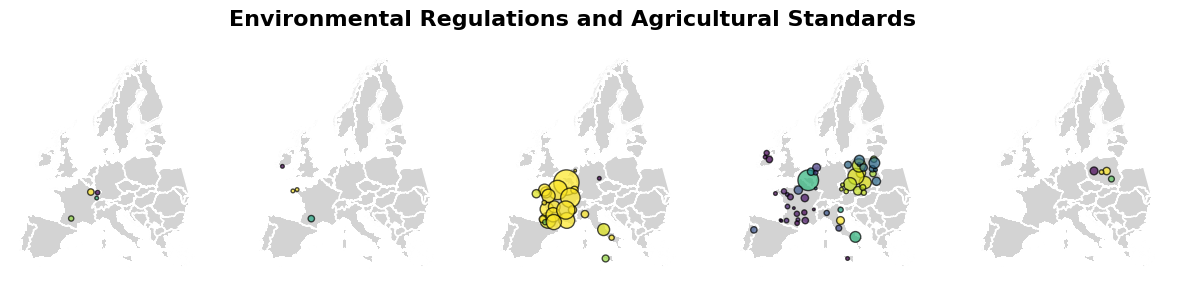

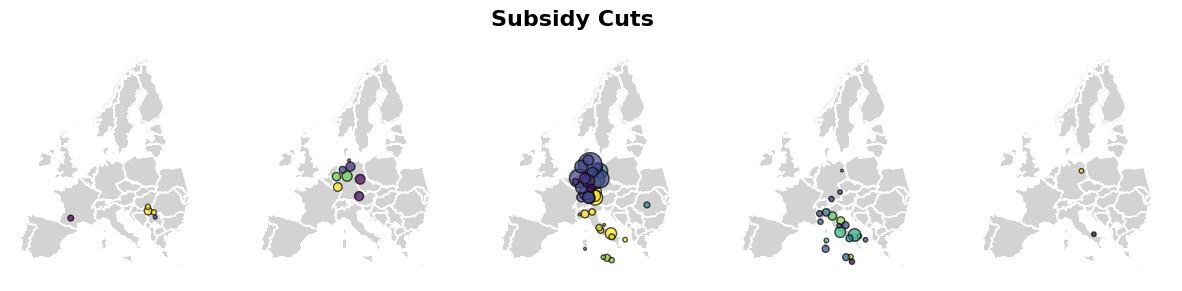

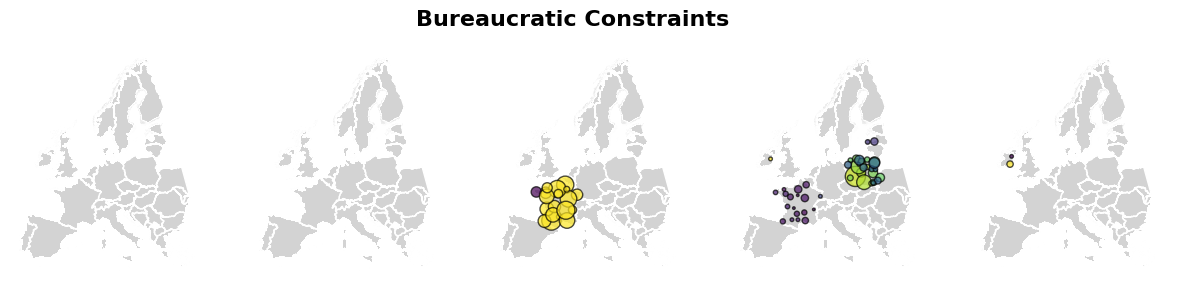

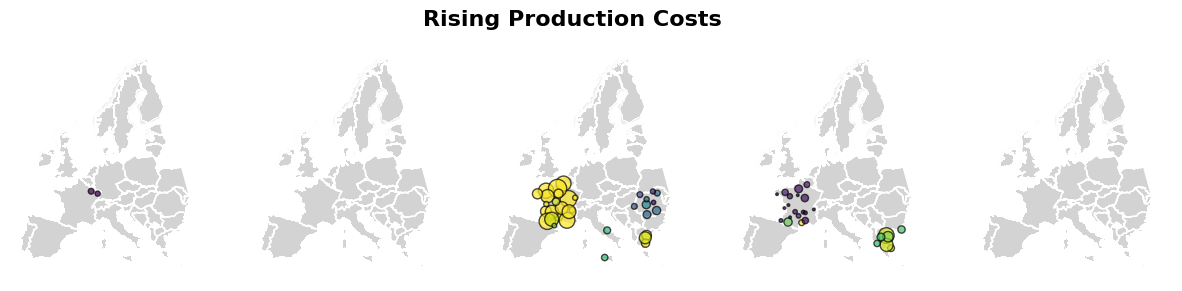

In [30]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint
from matplotlib.lines import Line2D
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from tqdm import tqdm

for i, reason in tqdm(enumerate(reason_list[1:6])):
    knox_gdf_sub = knox_gdf[knox_gdf["reason"]==reason]
    
    months = ['November 2023', 'December 2023', 'January 2024',
              'February 2024', 'March 2024']
    
    cmap = plt.cm.viridis   
    
    # fig, axes = plt.subplots(3, 2, figsize=(8, 14), sharex=True, sharey=True)
    fig, axes = plt.subplots(1, 5, figsize=(15, 4), sharex=True, sharey=True)
    
    # Add a figure-level title
    if i == 0:
        fig.suptitle(reason.replace('\n', ' '), fontsize=16, fontweight='bold', y=0.93)
    else:
        fig.suptitle(reason.replace('\n', ' '), fontsize=16, fontweight='bold', y=0.88)

    
    
    axes = axes.flatten()
    plot_positions = [0, 1, 2, 3, 4]  # maps go here
    legend_pos = 5  # empty subplot for legends
    
    # # --- Precompute global histogram limits and max y ---
    # all_cluster_days = []
    # for month in months:
    #     gdf_month = knox_gdf_sub[knox_gdf_sub['month_year'] == month]
    #     if gdf_month.empty:
    #         continue
    #     cluster_days_per_cluster = [group['cluster_days'].iloc[0] for _, group in gdf_month.groupby('cluster')]
    #     all_cluster_days.extend(cluster_days_per_cluster)
    
    # if all_cluster_days:
    #     x_min = min(all_cluster_days)
    #     x_max = max(all_cluster_days)
    # else:
    #     x_min, x_max = 0, 1  # fallback
    
    # Precompute max histogram height
    # max_count = 0
    # hist_data_dict = {}
    # for month in months:
    #     gdf_month = knox_gdf_sub[knox_gdf_sub['month_year'] == month]
    #     if gdf_month.empty:
    #         hist_data_dict[month] = []
    #         continue
    #     cluster_days_per_cluster = [group['cluster_days'].iloc[0] for _, group in gdf_month.groupby('cluster')]
    #     hist_data_dict[month] = cluster_days_per_cluster
    #     if cluster_days_per_cluster:
    #         counts, _ = np.histogram(cluster_days_per_cluster, bins=6, range=(x_min, x_max))
    #         max_count = max(max_count, counts.max())
    
    for month, pos in zip(months, plot_positions):
        gdf_month = knox_gdf_sub[knox_gdf_sub['month_year'] == month]
    
        europe0.plot(ax=axes[pos], color="lightgrey", edgecolor="white")

        if i == 0:
            axes[pos].set_title(month)
        else:
            axes[pos].set_title(None)
        
        if gdf_month.empty:
            axes[pos].axis('off')
            continue
        
        # --- Aggregate clusters ---
        cluster_points_list = []
        for cluster_id, group in gdf_month.groupby('cluster'):
            count = len(group)
            multipoint = MultiPoint(group.geometry.tolist())
            centroid = multipoint.centroid
            cluster_start = group['days_since_first'].iloc[0]
            cluster_days = group['cluster_days'].iloc[0]  # one value per cluster
            cluster_points_list.append({
                'cluster': cluster_id,
                'count': count,
                'cluster_start': cluster_start,
                'cluster_days': cluster_days,
                'geometry': centroid
            })
    
        if not cluster_points_list:
            axes[pos].axis('off')
            continue
    
        cluster_points = gpd.GeoDataFrame(cluster_points_list, crs=gdf_month.crs)
       
        # Normalize color scale for month
        norm = mpl.colors.Normalize(
            vmin=cluster_points['cluster_start'].min(),
            vmax=cluster_points['cluster_start'].max()
        )
        cluster_points['color_val'] = cluster_points['cluster_start']
        
        # --- Plot cluster centroids ---
        cluster_points.plot(
            ax=axes[pos],
            column='color_val',
            cmap=cmap,
            edgecolor="black",
            markersize=cluster_points['count'] * 3.5,
            legend=False,
            alpha=0.7,
            norm=norm
        )
        
        axes[pos].axis('off')
        
        # # --- Add inset histogram (upper left) ---
        # ax_inset = inset_axes(
        #     axes[pos],
        #     width="100%",      # width of inset
        #     height="100%",     # height of inset
        #     bbox_to_anchor=(0.05, 0.65, 0.25, 0.25),  # x0, y0, width, height in axes fraction
        #     bbox_transform=axes[pos].transAxes,
        #     loc='lower left'  # loc is needed but ignored when bbox_to_anchor is set
        # )
    
        # all_days = hist_data_dict[month]
        # ax_inset.hist(all_days, bins=6, color='steelblue', alpha=0.7, range=(x_min, x_max))
        # ax_inset.set_ylim(0, max_count)
        # ax_inset.set_xlim(x_min, x_max)
        
        # # Spine adjustments
        # ax_inset.spines['top'].set_visible(False)
        # ax_inset.spines['right'].set_visible(False)
        # ax_inset.yaxis.set_visible(True)  # hide y-axis entirely
        
        # # Tick adjustments
        # if all_days:
        #     xticks = np.linspace(x_min, x_max, 3)
        #     xticks = np.round(xticks).astype(int)  # integer ticks
        #     ax_inset.set_xticks(xticks)
        # ax_inset.tick_params(axis='x', labelsize=8)
        
        # # Add vertical red mean line with Ø annotation
        # if all_days:
        #     mean_val = np.mean(all_days)
        #     ax_inset.axvline(mean_val, color='red', linestyle='--', linewidth=1.5)
        #     ax_inset.text(
        #         mean_val*1.1, max_count*0.95, f"Ø={int(round(mean_val))}",
        #         color='red', fontsize=9, ha='left', va='top'
        #     )
        
        # ax_inset.set_title('Hotspot duration (days)', fontsize=10, ha="center")
    
    # # --- Build legends in subplot[2] ---
    # axes[legend_pos].axis('off')
    
    # # Size legend (top)
    # size_levels = [5, 10, 15, 20, 25, 30]
    # size_handles = [
    #     Line2D([0], [0], marker='o', color='w',
    #            markerfacecolor='grey', alpha=0.6,
    #            markersize=(s*5)**0.5,
    #            label=f"{s} events")
    #     for s in size_levels
    # ]
    
    # legend1 = axes[legend_pos].legend(
    #     handles=size_handles, title="Cluster size",
    #     loc="upper center", 
    #     bbox_to_anchor=(0.5, 1),
    #     fontsize=12,
    #     # ncol=len(size_handles),
    #     ncol=1,
    #     frameon=False
    # )
    # legend1.get_title().set_fontsize(13)
    # axes[legend_pos].add_artist(legend1)
    
    # # Slim, short horizontal colorbar (bottom)
    # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm._A = []
    # cax = inset_axes(
    #     axes[legend_pos],
    #     width="63%",
    #     height="3%",
    #     loc="lower center"
    # )
    # cbar = fig.colorbar(sm, cax=cax, orientation="horizontal")
    # cbar.set_ticks([norm.vmin, norm.vmax]) 
    # cbar.set_ticklabels(["1st", "31st"])
    
    # tick_labels = cbar.ax.get_xticklabels()
    # tick_labels[0].set_ha("left")
    # tick_labels[-1].set_ha("right")
    
    # cbar.ax.tick_params(length=0, labelsize=11)
    # cbar.set_label("Hotspot starting date", fontsize=13)
    # cbar.ax.xaxis.set_label_position("top")
    
    plt.savefig(f"../img/hs_{i}.png", dpi=600, bbox_inches="tight")

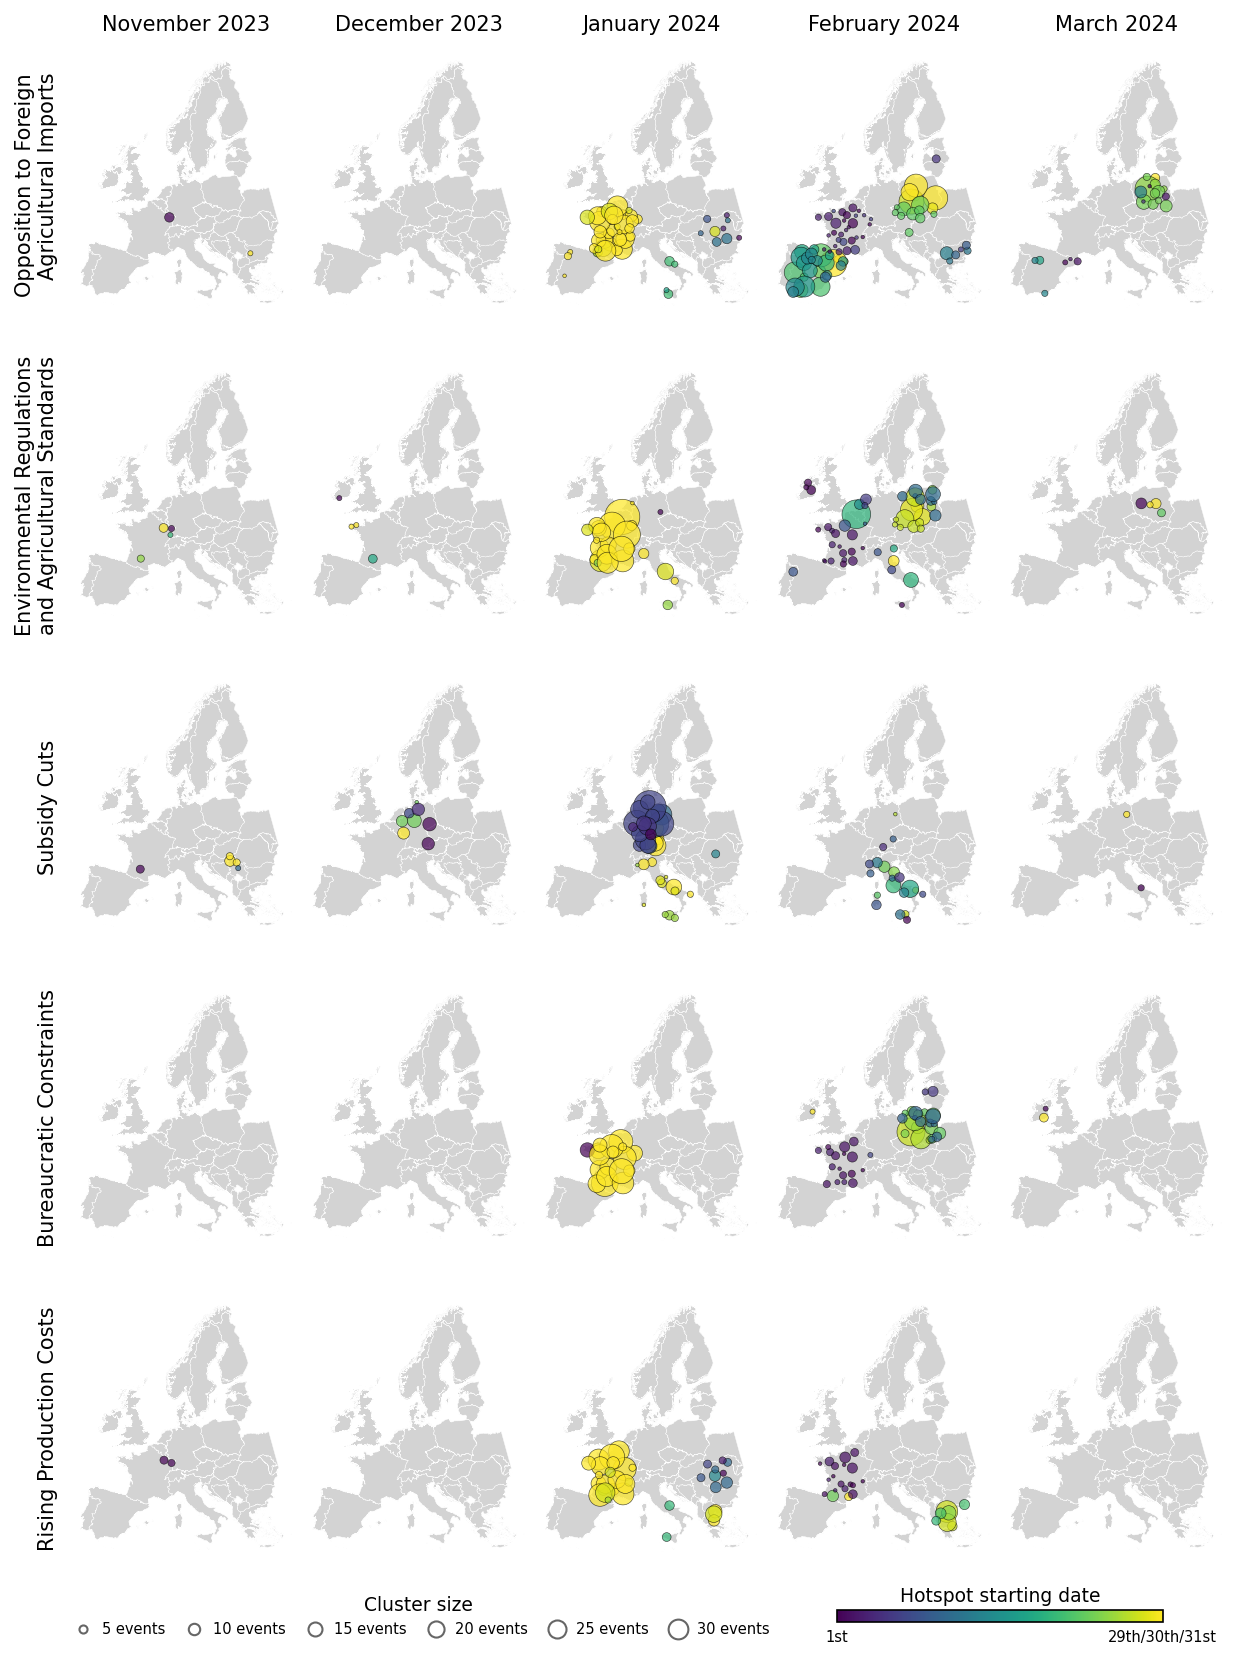

In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
from shapely.geometry import MultiPoint
from matplotlib import gridspec
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# ----------------------------
# Matplotlib safety settings
# ----------------------------
mpl.rcParams['path.simplify'] = True
mpl.rcParams['path.simplify_threshold'] = 0.5

# ----------------------------
# Figure + GridSpec
# ----------------------------
fig = plt.figure(figsize=(10, 14), dpi=150)

spec = gridspec.GridSpec(
    nrows=6,
    ncols=5,
    figure=fig,
    wspace=0.0,
    hspace=0.01,
    height_ratios=[1,1,1,1,1,.2]
)

months = [
    'November 2023',
    'December 2023',
    'January 2024',
    'February 2024',
    'March 2024'
]

cmap = plt.cm.viridis

# ----------------------------
# Maps (rows 0–2)
# ----------------------------
for i, reason in enumerate(reason_list[1:6]):

    knox_gdf_sub = knox_gdf[knox_gdf["reason"] == reason]

    for j, month in enumerate(months):

        ax = fig.add_subplot(spec[i, j])

        # Base map (FAST)
        europe0.plot(
            ax=ax,
            color="lightgrey",
            edgecolor="white",
            linewidth=0.2
        )


        # Titles
        if i == 0:
            ax.set_title(month, fontsize=10, y=1.02)

        if j == 0:
            ax.text(
                -0.05, 0.5,
                reason,
                transform=ax.transAxes,
                rotation=90,
                va='center',
                ha='right',
                fontsize=10
                # fontweight='bold'
            )

        gdf_month = knox_gdf_sub[
            knox_gdf_sub['month_year'] == month
        ]

        if gdf_month.empty:
            ax.axis("off")
            continue

        # ----------------------------
        # Aggregate clusters
        # ----------------------------
        cluster_points_list = []

        for _, group in gdf_month.groupby('cluster'):
            centroid = MultiPoint(group.geometry.values).centroid

            cluster_points_list.append({
                'count': len(group),
                'cluster_start': group['days_since_first'].iloc[0],
                'geometry': centroid
            })

        if not cluster_points_list:
            ax.axis("off")
            continue

        cluster_points = gpd.GeoDataFrame(
            cluster_points_list,
            crs=gdf_month.crs
        )

        norm = mpl.colors.Normalize(
            vmin=cluster_points['cluster_start'].min(),
            vmax=cluster_points['cluster_start'].max()
        )

        cluster_points.plot(
            ax=ax,
            column='cluster_start',
            cmap=cmap,
            markersize=cluster_points['count'] * 3,
            edgecolor="black",
            linewidth=0.3,
            alpha=0.7,
            norm=norm
        )

        ax.axis("off")

# ----------------------------
# Legends (row 5)
# ----------------------------
ax_size = fig.add_subplot(spec[5, 0:3])
ax_cbar = fig.add_subplot(spec[5, 3:5])

ax_size.axis("off")
ax_cbar.axis("off")

# ----------------------------
# Size legend
# ----------------------------
size_levels = [5, 10, 15, 20, 25, 30]

size_handles = [
    Line2D(
        [0], [0],
        marker='o',
        linestyle='',
        markerfacecolor='white',
        markeredgecolor='black',
        alpha=0.6,
        markersize=(s * 3) ** 0.5,
        label=f"{s} events"
    )
    for s in size_levels
]

legend = ax_size.legend(
    handles=size_handles,
    title="Cluster size",
    loc="center",
    frameon=False,
    fontsize=7,
    ncol=len(size_levels),          # horizontal markers
    handletextpad=0.3,
    columnspacing=1.0
)

legend.get_title().set_fontsize(9)
legend.get_title().set_ha("center")

# ----------------------------
# Colorbar legend
# ----------------------------
norm_global = mpl.colors.Normalize(vmin=1, vmax=31)
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm_global)
sm._A = []

cax = inset_axes(
    ax_cbar,
    width="70%",
    height="20%",
    loc="center"
)

cbar = fig.colorbar(
    sm,
    cax=cax,
    orientation="horizontal"
)

cbar.set_ticks([1, 31])
cbar.set_ticklabels(["1st", "29th/30th/31st"])
cbar.ax.tick_params(length=0, labelsize=7)
cbar.set_label("Hotspot starting date", fontsize=9)
cbar.ax.xaxis.set_label_position("top")

fig.align_titles()

# ----------------------------
# Show + cleanup
# ----------------------------
plt.savefig(f"../img/local_hotspots_combo.png", dpi=600, bbox_inches="tight", transparent=True)
plt.show()
plt.close(fig)


# Compare temporal pattern

In [82]:
# Select columns
sorted_cols_map = gdf.loc[:,'Rising Production Costs':'Miscellaneous Agriculture-\nRelated Protests'].sum().sort_values(ascending=False).index

selected_columns = ["event_date"] + df_results_full.loc[:, sorted_cols_map].columns.tolist()
df_results_selected = df_results_full[selected_columns]
df_results_selected['event_date'] = pd.to_datetime(df_results_selected['event_date'])

grouped_data = df_results_selected.groupby([pd.Grouper(key='event_date', freq='D')]).sum()


from sklearn.preprocessing import MinMaxScaler, StandardScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()

normalized_array = scaler.fit_transform(grouped_data)  # column-wise scaling
grouped_data = pd.DataFrame(
    normalized_array, 
    index=grouped_data.index, 
    columns=grouped_data.columns
)

C:\Users\cstetter\AppData\Local\Temp\ipykernel_11364\1741862083.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_selected['event_date'] = pd.to_datetime(df_results_selected['event_date'])


In [83]:
grouped_data.columns

Index(['Opposition to Foreign\nAgricultural Imports',
       'Environmental Regulations\nand Agricultural Standards', 'Subsidy Cuts',
       'Bureaucratic Constraints', 'Rising Production Costs',
       'National and Local State\nSupport',
       'Fair Compensation and\nMarket Practices',
       'Economic Struggles and\nAgricultural Livelihoods',
       'Climate and Natural\nDisaster Relief', 'Labor and Social\nConditions',
       'Opposition to EU Free-\nTrade Agreements', 'Solidarity Movements',
       'Infrastructure and\nTransport Policies',
       'Livestock and Animal\nWelfare Protests',
       'Miscellaneous Agriculture-\nRelated Protests',
       'Opposition to Non-\nTraditional Products',
       'Opposition to Renewable\nEnergy Projects',
       'Consumer Awareness\nInitiatives'],
      dtype='object')

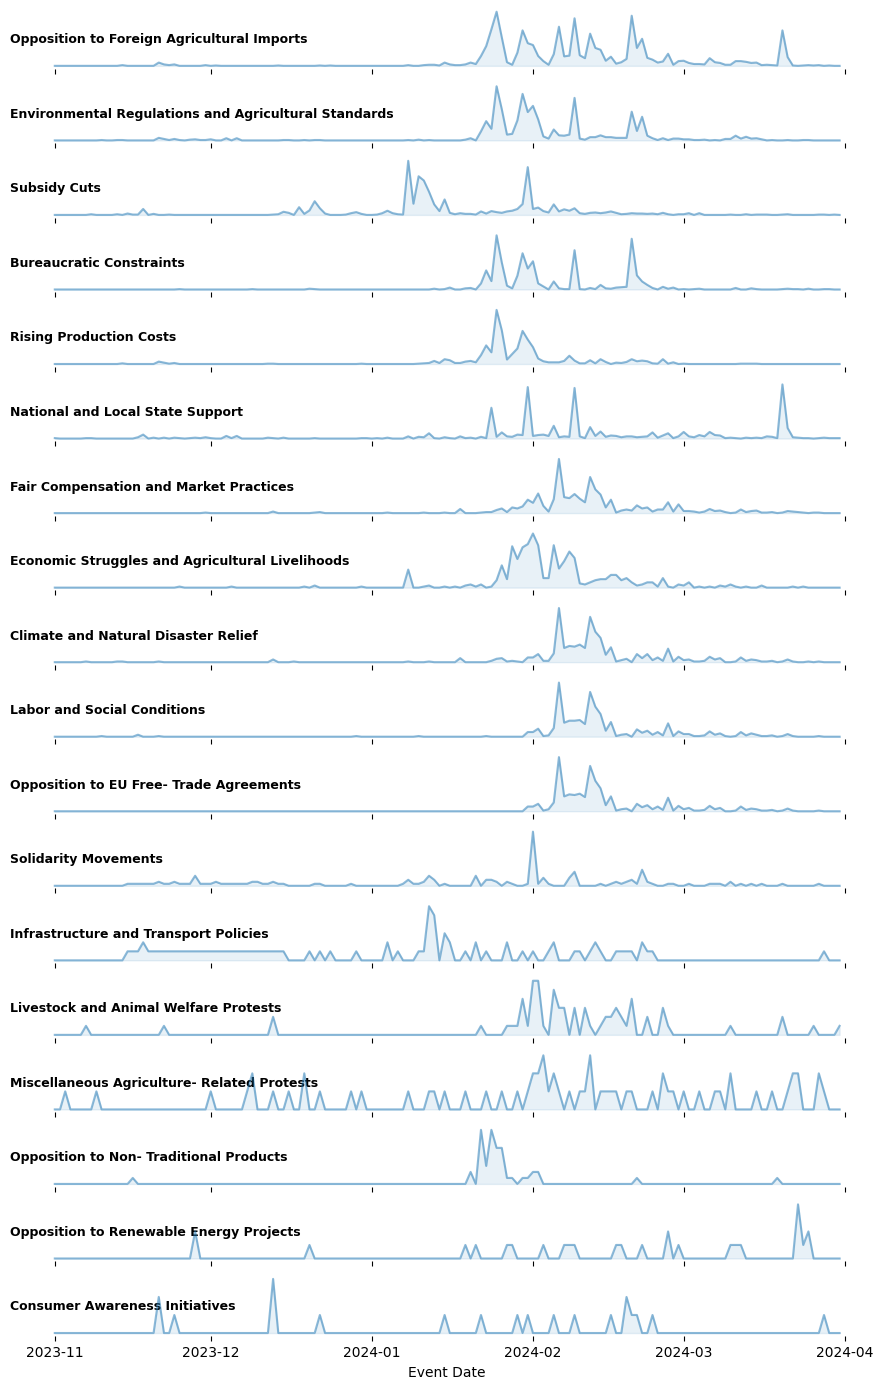

In [38]:
import matplotlib.pyplot as plt

# Replace \n with space in column names
grouped_data.columns = grouped_data.columns.str.replace("\n", " ")

# Number of columns
n_cols = grouped_data.shape[1]

fig, axes = plt.subplots(
    nrows=n_cols, ncols=1, 
    figsize=(9, 14), 
    sharex=True
)

for i, col in enumerate(grouped_data.columns):
    axes[i].plot(grouped_data.index, grouped_data[col], alpha=0.5, label=col, color="C0")
    axes[i].fill_between(grouped_data.index, grouped_data[col], alpha=0.1, color="C0")
    axes[i].set_ylabel(col, rotation=0, ha='left', va='center', zorder=10, fontweight="bold", fontsize=9)
    # axes[i].legend(loc="upper right", fontsize=8, frameon=False)

    # Remove y-ticks and labels
    axes[i].set_yticks([])
    axes[i].set_yticklabels([])
    
    # Remove all spines
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    
# Common x-axis label
axes[-1].set_xlabel("Event Date")

plt.savefig("../img/temporal_evol.png", dpi=600, bbox_inches="tight")
plt.tight_layout()
plt.show()


In [47]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import permutation_test
from dtaidistance import dtw


def euclidean_distance(x, y):
    """Compute Euclidean distance between two vectors."""
    return np.linalg.norm(np.array(x) - np.array(y))


def dtw_distance(x, y):
    return dtw.distance(x, y)

In [48]:
import itertools
from statsmodels.stats.multitest import multipletests


# Initialize a list to store the results of each test
results_list = []

# Get all unique pairs of column names
column_pairs = itertools.combinations(grouped_data.columns, 2)



# Loop through each column pair, run the permutation test, and store the results
for col1, col2 in tqdm(column_pairs):
    x_data = grouped_data[col1].values
    y_data = grouped_data[col2].values
    
    res = permutation_test(
        (x_data,y_data),
        statistic = euclidean_distance,
        n_resamples=10000,
        alternative="two-sided",
        permutation_type='pairings',
        random_state=42
    )
    
    results_list.append({
        'x': col1,
        'y': col2,
        'dist': res.statistic,
        'p-value': res.pvalue
    })



# Create the final DataFrame from the collected results
df_final = pd.DataFrame(results_list)



C:\Users\cstetter\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_resampling.py:1492: RuntimeWarning: overflow encountered in scalar power
  n_max = factorial(n_obs_sample)**n_samples
153it [01:31,  1.66it/s]


In [49]:
# Benjamini-Hochberg FDR
# Multiple hypothesis adjustment
alpha = 0.05  # significance level
pvals = df_final['p-value'].values

df_final['p_bh'] = multipletests(pvals, method='fdr_bh')[1]
df_final['sig_bh'] = df_final['p_bh'] < alpha

In [54]:
import pandas as pd
import numpy as np

# Get list of columns
cols = grouped_data.columns

# Initialize empty distance matrix
dist_matrix = pd.DataFrame(np.nan, index=cols, columns=cols)

# Fill the matrix from df_final
for _, row in df_final.iterrows():
    x = row['x']
    y = row['y']
    dist_matrix.loc[x, y] = row['dist']
    dist_matrix.loc[y, x] = row['dist']  # symmetric

# Fill diagonal with 0 (distance to self)
np.fill_diagonal(dist_matrix.values, 0)


# Initialize empty p-value matrix
cols = grouped_data.columns
pbh_matrix = pd.DataFrame(np.nan, index=cols, columns=cols)

# Fill the matrix from df_final
for _, row in df_final.iterrows():
    x = row['x']
    y = row['y']
    pbh_matrix.loc[x, y] = row['p_bh']
    pbh_matrix.loc[y, x] = row['p_bh']  # symmetric

# Fill diagonal with 1 (self-comparison)
np.fill_diagonal(pbh_matrix.values, 1)




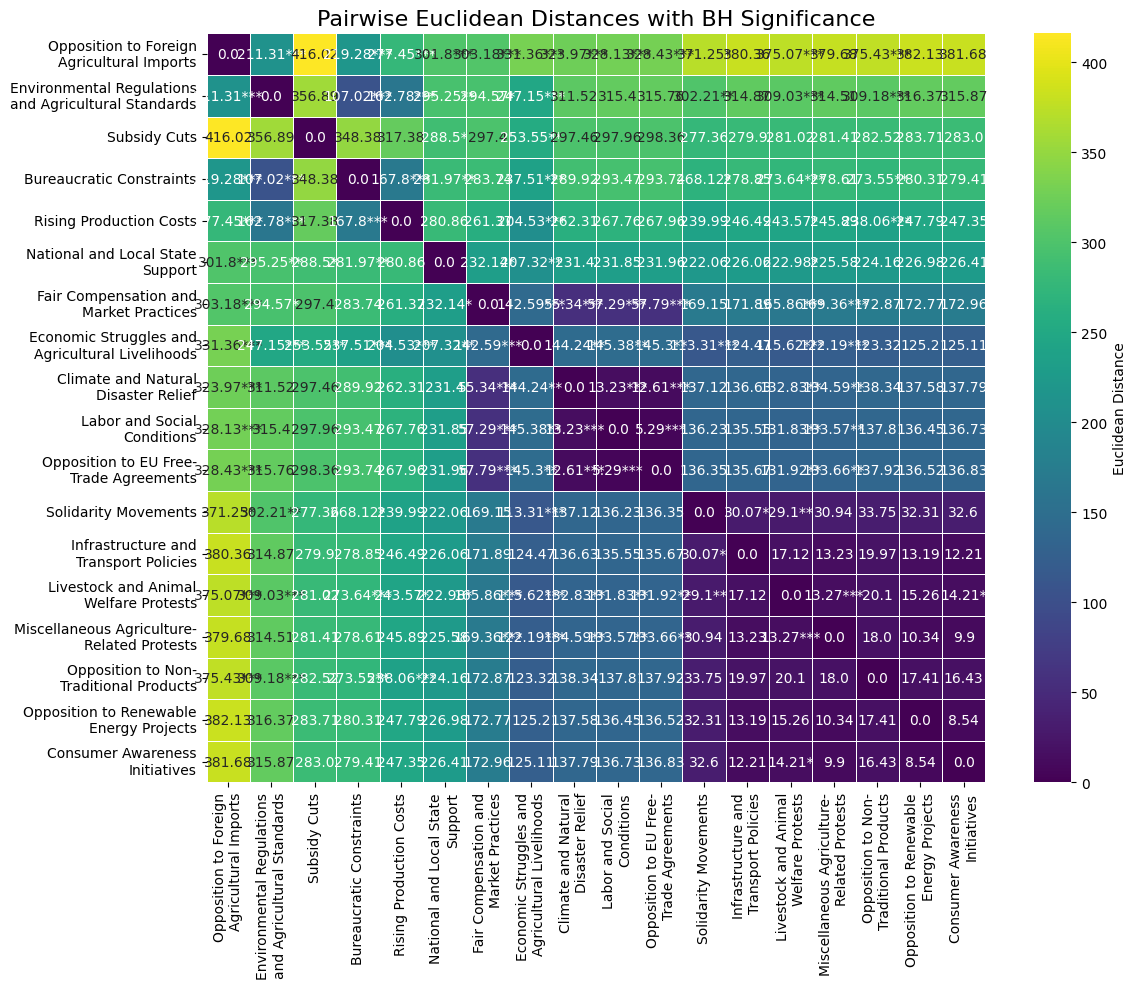

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to convert p-value to asterisks
def pval_to_asterisk(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

# Create annotation matrix: dist value + asterisks
annot_matrix = dist_matrix.round(2).astype(str)
for i in dist_matrix.index:
    for j in dist_matrix.columns:
        annot_matrix.loc[i, j] += pval_to_asterisk(pbh_matrix.loc[i, j])

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    dist_matrix,
    annot=annot_matrix,
    fmt='',
    cmap='viridis',
    cbar_kws={'label': 'Euclidean Distance'},
    linewidths=0.5,
    linecolor='white'
)
plt.title('Pairwise Euclidean Distances with BH Significance', fontsize=16)
plt.yticks(rotation=0, va='center')  # keep row labels horizontal
# plt.xticks(rotation=90, ha='right', va="bottom")  # rotate column labels
plt.xticks(rotation=90, ha='right', va='center', rotation_mode='anchor')

plt.tight_layout()
plt.show()


In [52]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from matplotlib.patches import Rectangle


cols = grouped_data.columns
n = len(cols)

fig = plt.figure(figsize=(1.5*n, n))
gs = gridspec.GridSpec(n, n, wspace=0.1, hspace=0.1)

for i, col_i in enumerate(cols):
    for j, col_j in enumerate(cols):
        ax = fig.add_subplot(gs[i, j])
        
        if i > j:
            # Lower triangle: distance matrix with color
            c = dist_matrix.loc[col_i, col_j]
            color = plt.cm.viridis((c - dist_matrix.values.min()) / (dist_matrix.values.max() - dist_matrix.values.min()))
            
            # Fill the entire axes with a colored rectangle
            rect = Rectangle((0, 0), width=1, height=1, transform=ax.transAxes, color=color)
            ax.add_patch(rect)
            
            # Add text annotation
            ax.text(0.5, 0.5, f"{c:.2f}\n{pval_to_asterisk(pbh_matrix.loc[col_i, col_j])}",
                    ha='center', va='center', color='white', fontsize=12)
            
            ax.set_xticks([])
            ax.set_yticks([])
            
        elif i == j:
            # Diagonal: plot the column's time series
            ax.plot(grouped_data.index, grouped_data[col_i].values, color='C0')
            ax.set_yticks([])
            ax.set_xticks([])
            
        else:
            # Upper triangle: plot x vs y values
            ax.plot(grouped_data.index, grouped_data[col_i].values, color="C0")
            ax.plot(grouped_data.index, grouped_data[col_j].values, color='C1')
            ax.set_yticks([])
            ax.set_xticks([])

        # Show x-axis labels only on bottom row
        if i == n-1:
            ax.set_xlabel(col_j, rotation=90, ha='center')
        else:
            ax.set_xticks([])

        # Show y-axis labels only on leftmost column
        if j == 0:
            ax.set_ylabel(col_i, rotation=0, ha='right', va='center')
        else:
            ax.set_yticks([])

plt.tight_layout()
plt.savefig("../img/dtw_all.png", dpi=600, bbox_inches="tight")

plt.close()


C:\Users\cstetter\AppData\Local\Temp\ipykernel_5956\4169570210.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Dynamic Time Warping

In [56]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Subset first 5 columns
cols = grouped_data.columns[:6]
dist_sub = dist_matrix.loc[cols, cols]
pbh_sub = pbh_matrix.loc[cols, cols]
data_sub = grouped_data[cols]

n = len(cols)

fig = plt.figure(figsize=(1.3*n, n))
gs = gridspec.GridSpec(n, n, wspace=0.1, hspace=0.1)

for i, col_i in enumerate(cols):
    for j, col_j in enumerate(cols):
        ax = fig.add_subplot(gs[i, j])
        
        if i > j:
            # Lower triangle: distance matrix with color
            c = dist_matrix.loc[col_i, col_j]
            color = plt.cm.viridis((c - dist_matrix.values.min()) / (dist_matrix.values.max() - dist_matrix.values.min()))
            
            # Fill the entire axes with a colored rectangle
            rect = Rectangle((0, 0), width=1, height=1, transform=ax.transAxes, color=color)
            ax.add_patch(rect)
            
            # Add text annotation
            ax.text(0.5, 0.5, f"{c:.2f}\n{pval_to_asterisk(pbh_matrix.loc[col_i, col_j])}",
                    ha='center', va='center', color='white', fontsize=12)
            
            ax.set_xticks([])
            ax.set_yticks([])
            
        elif i == j:
            # Diagonal: plot the column's time series
            ax.plot(grouped_data.index, grouped_data[col_i].values, color='C0')
            ax.set_yticks([])
            ax.set_xticks([])
            
        else:
            # Upper triangle: plot x vs y values
            ax.plot(grouped_data.index, grouped_data[col_i].values, color="C0")
            ax.plot(grouped_data.index, grouped_data[col_j].values, color='C1')
            ax.set_yticks([])
            ax.set_xticks([])

        # Show x-axis labels only on bottom row
        if i == n-1:
            ax.set_xlabel(col_j, rotation=90, ha='right', va='center', rotation_mode='anchor')
        else:
            ax.set_xticks([])

        # Show y-axis labels only on leftmost column
        if j == 0:
            ax.set_ylabel(col_i, rotation=0, ha='right', va='center')
        else:
            ax.set_yticks([])

plt.tight_layout()
plt.savefig("../img/dtw_important.png", dpi=600, bbox_inches="tight")

plt.close()


C:\Users\cstetter\AppData\Local\Temp\ipykernel_5956\2060512361.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
